<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch11_Notebook_FonctionsDeuxVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch11 - Notebook : Fonctions de deux variables**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact
from IPython.display import display

from math import exp, sqrt

* **La fonction :**

$$f:  \left\{\begin{matrix}
\mathbb{R}^2& \to & \mathbb{R}  \\ (x ; y) & \mapsto &f \left( x ; y\right) = \left(x^3 + y^2\right).e^{-\left( x^2 + y^2\right)}
\end{matrix}\right.$$

In [3]:
def f(x,y) :
    try : # permet d'écarter les problèmes de domaine de définition
        z = (x**3 + y**2)*exp(-(x**2+y**2))
        return z
    except :
        return None # Lorsque la fonction rencontre une "math domain error", elle ne renvoie rien


f = np.vectorize(f) # pour travailler vectoriellement (lots de valeurs) avec la fonction initialement numérique

## **Dessiner la surface représentative d'une fonction de deux variables $(x ; y) \mapsto z = f \left ( (x ; y)\right)$ .**

Le principe est assez simple : à partir d'un vecteur de valeurs de x et de valeurs de y, on crée un maillage ("*meshgrid*"), on calcule les images par f de tous les points du maillage, puis on place tout ça dans un repère 3D.

* **Maillage du terrain**

In [4]:
x = np.arange(-2.8, 2.8, 0.1)   # vecteur des abscisses
y = np.arange(-2.5, 2.5, 0.1)   # vecteur des ordonnées

X, Y = np.meshgrid(x, y)        # maillage des deux vecteurs x et y

Z = f(X,Y)                      # images des points du maillage

* **Tracé de la surface 3D**

(commande *plot_surface*)

La surface est matérialisée par des facettes correspondant à chaque rectangle du maillage.

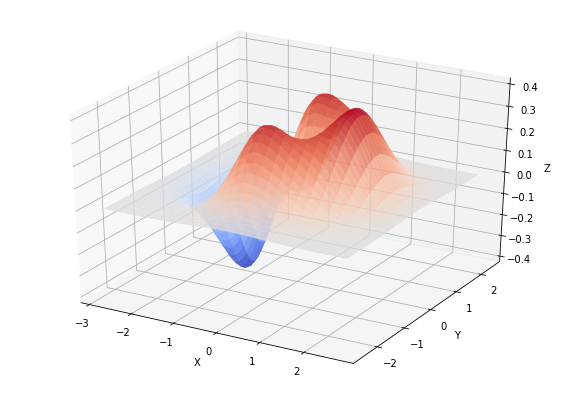

In [5]:
fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique

ax=fig.gca(projection='3d')         # fenêtre 3D

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.8) # la commande principale, cmap : carte des couleurs

# nom des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


* **Graphique intéractif :**

Jouer avec les curseurs pour changer l'angle de vue :    
* longitude : rotation horizontale
* latitude : élévation verticale

In [6]:
def graph_interactif( latitude=30,longitude=-100):
    # angles de vue : 
    #                   latitude : élévation verticale
    #                   longitude : rotation horizontale
    fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique

    ax=fig.gca(projection='3d')         # fenêtre 3D
    ax.view_init(latitude, longitude)   # angle de vue initial

    ax.plot_surface(X, Y, Z, cmap='coolwarm') # la commande principale, cmap : carte des couleurs

    # nom des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# commande de gestion de l'interactivité : les curseurs permettent de régler l'angle de vue (latitude, longitude)
# vue de dessus : (0 ; 90)
interact(graph_interactif, latitude = (-90, 90, 1), longitude = (-180, 180, 1))
plt.show()

interactive(children=(IntSlider(value=30, description='latitude', max=90, min=-90), IntSlider(value=-100, desc…

* **Version "fil de fer"**

(commande *wireframe*)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


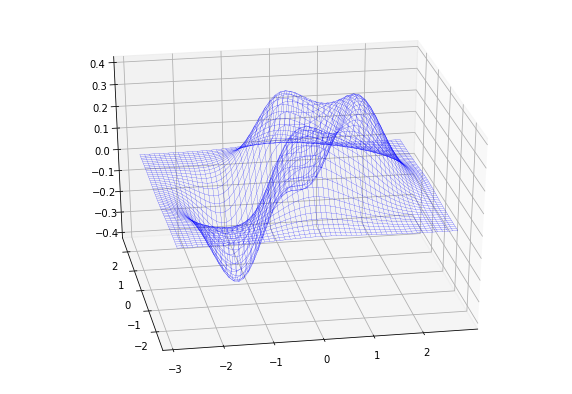

In [7]:
fig2=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
ax=fig2.gca(projection='3d')         # fenêtre 3D

ax.view_init(30, -100)   # angle de vue

#ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.8) # superposition surface + fil de fer
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color = 'blue', linewidth = 0.2) # figure en fil de fer

plt.show()

* **Échelle de légende des couleurs**

(commande *colobar*)

Ici, la *map* de couleur est *'ghist-earth'* (couleurs de la Terre), et on a marqué les bords des facettes

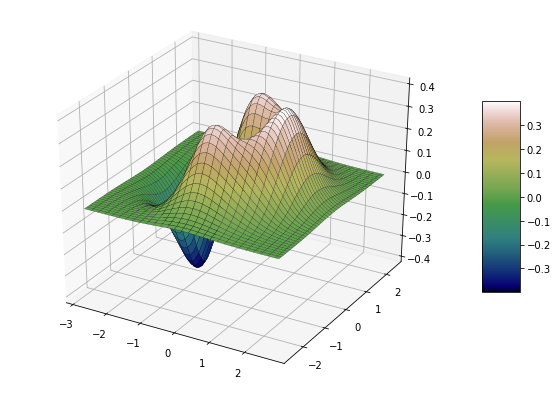

In [8]:
fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
ax=fig.gca(projection='3d')         # fenêtre 3D

# la commande principale(cmap : carte des couleurs, alpha : transparence, edgecolor : couleur du grillage, linewidth : largeur du trait)
surf = ax.plot_surface(X, Y, Z, cmap='gist_earth', alpha = 1, edgecolor='black', linewidth = 0.2)   
fig.colorbar(surf, shrink=0.5, aspect=5)                        # échelle des valeurs par couleur

plt.show()

## **Lignes de niveau 2D**

(commande *contour*)

Les lignes de niveaux sont, dans le plan $(x ; y)$, les courbes d'équation $f(x ; y) = k$

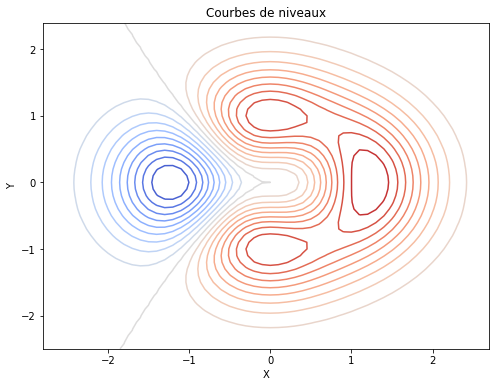

In [9]:
fig=plt.figure(figsize =(8,6))     # taille de la fenêtre graphique

# lignes de niveau dans le plan (X,Y), aux cotes Z, entre le min et le max de Z, avec un  nombre de lignes fixé
lignes = plt.contour(X, Y, Z, np.linspace(np.min(Z),np.max(Z),21), cmap='coolwarm') 
# plt.clabel(cont,fmt='%1.1f') # étiquetage des lignes

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Courbes de niveaux')
# fig.colorbar(clignes, shrink=0.5, aspect=5) # échelle

plt.show()

* **Représentation 3D des lignes de niveaux, sur la surface**

(commande *contour3D*)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


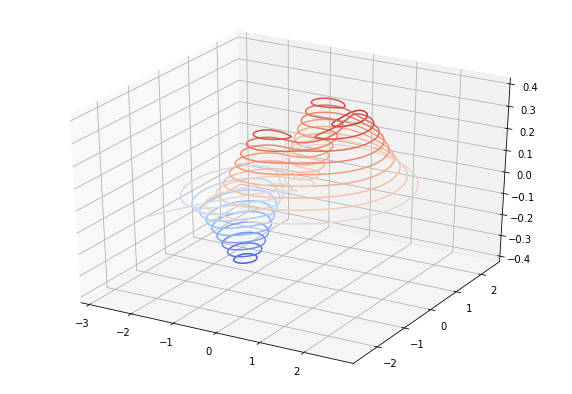

In [10]:
fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
ax=fig.gca(projection='3d')         # fenêtre 3D


#ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 1) # la commande principale, cmap : carte des couleurs
ax.contour3D(X,Y,Z,np.linspace(np.min(Z),np.max(Z),21), cmap='coolwarm')


plt.show()



* le même en interactif

In [11]:
def graph_interactif( latitude=30,longitude=-100):
    # angles de vue : 
    #                   latitude : élévation verticale
    #                   longitude : rotation horizontale
    fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique

    ax=fig.gca(projection='3d')         # fenêtre 3D
    ax.view_init(latitude, longitude)   # angle de vue initial

    ax.contour3D(X,Y,Z,np.linspace(np.min(Z),np.max(Z),21), cmap='coolwarm') # la commande principale, cmap : carte des couleurs

    # nom des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# commande de gestion de l'interactivité : les curseurs permettent de régler l'angle de vue (latitude, longitude)
# vue de dessus : (0 ; 90)
interact(graph_interactif, latitude = (-90, 90, 1), longitude = (-180, 180, 1))
plt.show()

interactive(children=(IntSlider(value=30, description='latitude', max=90, min=-90), IntSlider(value=-100, desc…

* **Surface et projections dans les plans du repère : lignes de niveau dans le plan (x ; y) et ombres dans les plans (x ; z) et (y ; z)**

(commande *contourf*)

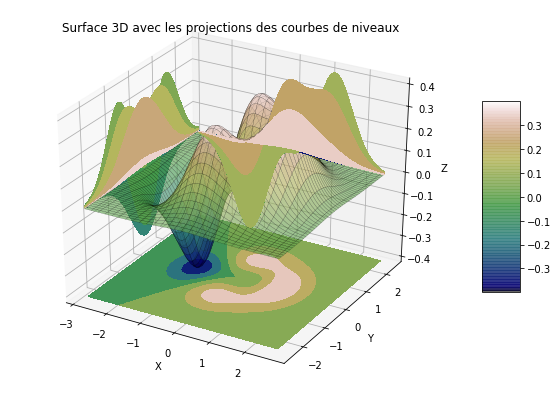

In [12]:
fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
ax=fig.gca(projection='3d')         # fenêtre 3D

cm = 'gist_earth'

cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=np.min(X), cmap=cm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=np.max(Y), cmap=cm)


surf = ax.plot_surface(X, Y, Z, cmap=cm, alpha = 0.6, edgecolor='black', linewidth = 0.2)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Surface 3D avec les projections des courbes de niveaux')

plt.show()


In [13]:
def graph_interactif( latitude=30,longitude=45):
    # angles de vue : 
    #                   latitude : élévation verticale
    #                   longitude : rotation horizontale
    fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
    ax=fig.gca(projection='3d')         # fenêtre 3D
    ax.view_init(latitude, longitude)   # angle de vue initial
    
    cm = 'gist_earth'
    surf = ax.plot_surface(X, Y, Z, cmap=cm, alpha = 0.7, edgecolor='black', linewidth = 0.2)

    cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm)
    cset = ax.contourf(X, Y, Z, zdir='x', offset=np.min(X), cmap=cm)
    cset = ax.contourf(X, Y, Z, zdir='y', offset=np.max(Y), cmap=cm)

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_title('Surface 3D avec les projections des courbes de niveaux')

# commande de gestion de l'interactivité : les curseurs permettent de régler l'angle de vue (latitude, longitude)
# vue de dessus : (0 ; 90)
interact(graph_interactif, latitude = (-90, 90, 1), longitude = (-180, 180, 1))
plt.show()

interactive(children=(IntSlider(value=30, description='latitude', max=90, min=-90), IntSlider(value=45, descri…

## **Le Gradient**

Rappelons que le gradient d'une fonction de deux variables est un vecteur de taille 2, il se représente donc dans le plan $(x ; y)$

Il va nous servir dans les paragraphes suivants pour :
* dessiner le champ de grandients 2D ou 3D
* tracer le plan tangent en un point de la surface
* regarder une bille tomber, par une "descente de gradient"

*  **Le Gradient**

In [14]:
# Définition du gradient :
def gradient(x, y) :
    sur_dx = (3*x**2 + (x**3 +y**2)*(-2*x))*exp(-(x**2+y**2))
    sur_dy = (2*y + (x**3 +y**2)*(-2*y))*exp(-(x**2+y**2))
    return sur_dx, sur_dy  

gradient = np.vectorize(gradient)


## **Champ de gradients**

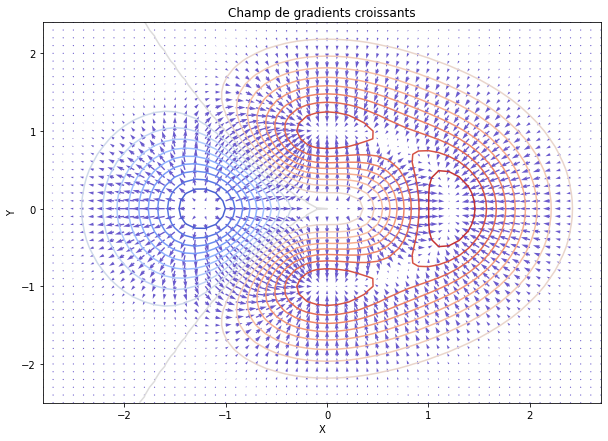

In [15]:
fig=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique

U, V=gradient(X, Y)
plt.quiver(X, Y, U, V, color ='slateblue') # Tracé du champ de vecteurs

# pour superposer les lignes de niveau et observer que le gradient est perpendiculaire aux lignes de niveaux
plt.contour(X, Y, Z, np.linspace(np.min(Z),np.max(Z),21), cmap='coolwarm') 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Champ de gradients croissants')

plt.show()

## **Plan tangent**

équation : $z - z_0 = \frac{\partial f }{\partial x}(x_0 ; y_0) . (x - x_0) + \frac{\partial f }{\partial y}(x_0 ; y_0) . (y - y_0)$

In [16]:
def coord_plan_tangent(x,y,x0,y0) :
    z0 = f(x0,y0)
    sur_dx , sur_dy = gradient(x0,y0)
    z = z0 + sur_dx * (x-x0) + sur_dy*(y-y0)
    return z


coord_plan_tangent = np.vectorize(coord_plan_tangent)
x0 = 1
y0 = 0.8
z0 = f(x0,y0)
ZZ = coord_plan_tangent(X,Y,x0,y0)



/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


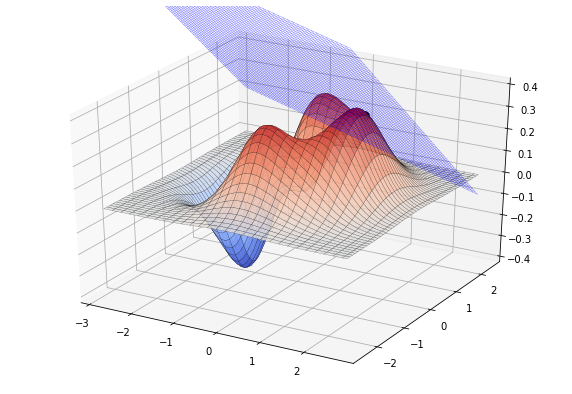

In [17]:
fig2=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
ax=fig2.gca(projection='3d')         # fenêtre 3D

#ax.view_init(30, -100)   # angle de vue

ax.scatter(x0,y0,z0, marker = 'o' , color = 'black', s = 100)
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.8, edgecolor='black', linewidth = 0.2) # superposition surface + fil de fer
ax.plot_wireframe(X, Y, ZZ, rstride=1, cstride=1, color = 'blue', linewidth = 0.2) # figure en fil de fer

ax.set_zlim3d(np.min(Z),np.max(Z))
plt.show()

* interactif

In [18]:
def graph_interactif( latitude=30,longitude=-70, x0=1.3, y0 = 0.1):
    # angles de vue : 
    #                   latitude : élévation verticale
    #                   longitude : rotation horizontale

    z0 = f(x0,y0)
    ZZ = coord_plan_tangent(X,Y,x0,y0)

    fig3=plt.figure(figsize =(10,7))     # taille de la fenêtre graphique
    ax=fig3.gca(projection='3d')         # fenêtre 3D

    ax.view_init(latitude, longitude)   # angle de vue
    ax.set_zlim3d(np.min(Z),np.max(Z))

    ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 1,edgecolor='black', linewidth = 0.2) # superposition surface + fil de fer
    ax.plot_surface(X, Y, ZZ, color='blue', alpha = 0.6) 
    #ax.plot_wireframe(X, Y, ZZ, rstride=1, cstride=1, color = 'blue', linewidth = 0.2, alpha = 0.5) # figure en fil de fer
    ax.scatter(x0,y0,z0, marker = 'o' , color = 'black', s = 100)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_title('Plan tangent en ('+str(x0)+' , '+str(y0)+' , '+str(z0)+')')
    
# commande de gestion de l'interactivité : les curseurs permettent de régler l'angle de vue (latitude, longitude)
# vue de dessus : (0 ; 90)
interact(graph_interactif, latitude = (-90, 90, 1), longitude = (-180, 180, 1), x0 = (np.min(X),np.max(X), 0.1), y0 = (np.min(Y),np.max(Y), 0.1))
plt.show()

interactive(children=(IntSlider(value=30, description='latitude', max=90, min=-90), IntSlider(value=-70, descr…

## **Champ de pentes 3D**

Il s'agit de tracer sur la surface-même les vecteurs gradients.

Pour obtenir les composantes de ce gradient3D on a :    
*  bien sûr, selon l'axe des x, $\frac{\partial f}{\partial x} (x ; y)$, 
* et sur l'axe des y : $\frac{\partial f}{\partial y} (x ; y)$, (voir le graphique suivant avec une latitude de 90° et une longitude de -90° pour s'en convaincre)
* puis selon l'axe des z, on calcule la différence entre $z$ et l'image du point $\left ( x + \frac{\partial f}{\partial x} (x ; y) ; y + \frac{\partial f}{\partial y} (x ; y) \right )$


In [19]:
# Définition du gradient3D :
def gradient3D(x, y) :
    z = f(x,y)
    sur_dx = (3*x**2 + (x**3 +y**2)*(-2*x))*exp(-(x**2+y**2))
    sur_dy = (2*y + (x**3 +y**2)*(-2*y))*exp(-(x**2+y**2))
    zz = f(x+sur_dx,y + sur_dy)
    sur_dz =  zz - z
    return sur_dx, sur_dy , sur_dz

gradient3D = np.vectorize(gradient3D)


In [20]:
U,V,W = gradient3D(X,Y)

In [21]:
def graph_interactif( latitude=30,longitude=-120):
    # angles de vue : 
    #                   latitude : élévation verticale
    #                   longitude : rotation horizontale
    fig=plt.figure(figsize =(20,14))     # taille de la fenêtre graphique

    ax=fig.gca(projection='3d')         # fenêtre 3D
    ax.view_init(latitude, longitude)   # angle de vue initial

    ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.5) # la commande principale, cmap : carte des couleurs
    ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True, color = 'blue', linewidth = 0.4)

    # nom des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# commande de gestion de l'interactivité : les curseurs permettent de régler l'angle de vue (latitude, longitude)
# vue de dessus : (0 ; 90)
interact(graph_interactif, latitude = (-90, 90, 1), longitude = (-180, 180, 1))
plt.show()

interactive(children=(IntSlider(value=30, description='latitude', max=90, min=-90), IntSlider(value=-120, desc…

## **Chute d'une bille : la "descente de gradient"**

Habituellement, le gradient, comme toute dérivée, est dirigé dans e sens croissant de la fonction.

Une bille qui roule cherche la direction de plus grande pente.
Donc, si on veut faire tomber la bille, il va falloir traiter avec l'opposé du gradient, pour viser les creux plutôt que les bosses.

Très utilisée en Intelligence Artificielle, pour faire que la machine donne l'impression d'apprendre, la descente de gradient est une méthode approchée, à l'instar de la méthode d'Euler pour la construction de la fonction exponentielle : en un point donné, on calcule l'image du point et le gradient, on fait un petit pas (appelé "taux d'apprentissage", *learning rate* en anglais)dans sa direction et on recommence.

Il faut calibrer le *learning rate* pour que la descente soit harmonieuse : trop petit, la bille n'avance pas assez vite, trop grand, elle risque de rebondir de part et d'autre du minimum.

Pour simuler la chute d'une bille, on la place donc initialement quelque part sur la surface, et ... on suit les flèches, sur le même procédé que ci-dessus.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':


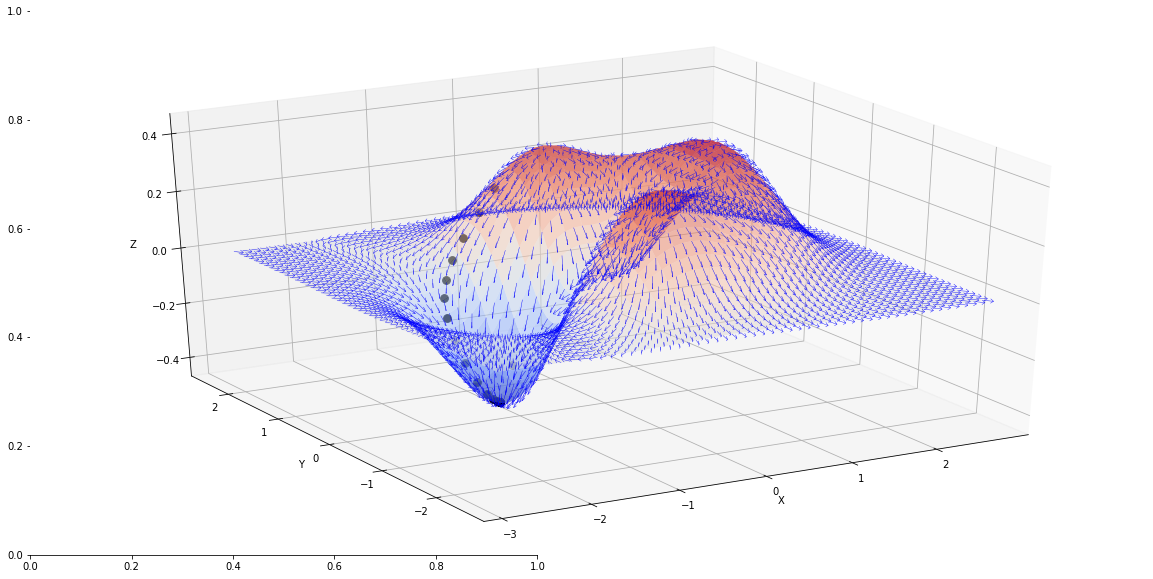

In [79]:
import numpy.random as rd


    
# la surface et son champ de pentes
fig=plt.figure(figsize =(20,10))     # taille de la fenêtre graphique
plt.subplot(1, 2, 1)

ax1=fig.gca(projection='3d')         # fenêtre 3D
ax1.view_init(30, -120)   # angle de vue initial

ax1.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.5) # la commande principale, cmap : carte des couleurs
ax1.quiver(X, Y, Z, -U, -V, -W, length=0.1, normalize=True, color = 'blue', linewidth = 0.4)

# nom des axes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

#################################################################################################################
# placement initial aléatoire
x0 = -0.4 #rd.random()*(np.max(x) - np.min(x)) + np.min(x) #
y0 = 1.1 #rd.random()*(np.max(y) - np.min(y)) + np.min(y) #
zzz = f(xxx,yyy)
xxx = x0
yyy = y0
N = 20 # nombre d'itérations
lr = 0.4 # taux d'apprentissage


# c'est parti... (il faut recalculer la trajectoire à chaque changement d'angle de vue...)
for k in range(N) :
    ax1.scatter(xxx,yyy,zzz, marker = 'o' , color = 'black', s = 60)
    uuu,vvv = gradient(xxx,yyy)
    xxx = xxx - uuu * lr
    yyy = yyy - vvv * lr
    zzz = f(xxx,yyy)
    
##################################################################################################################


plt.show()

* **Vue conjointe 3D et de dessus**

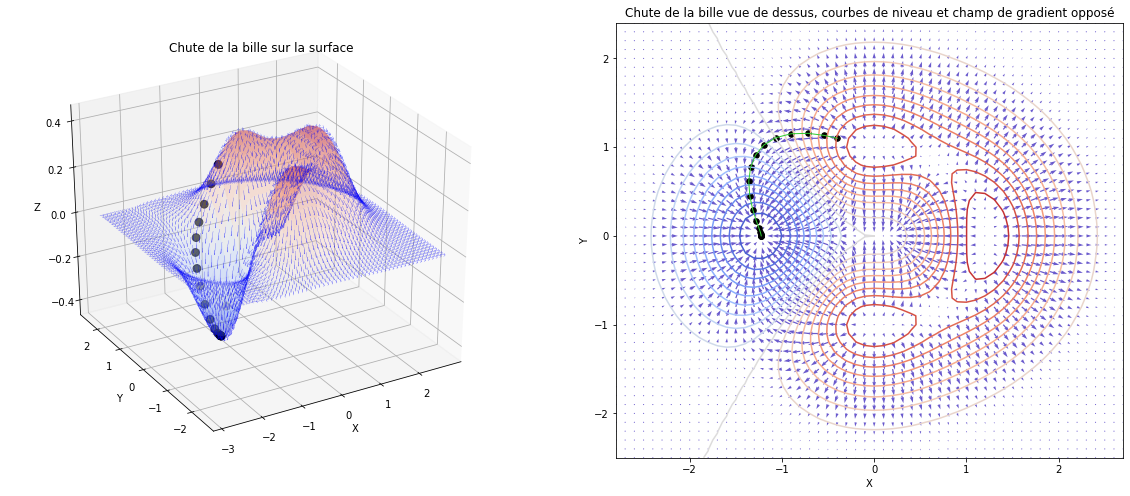

In [111]:
### Chute de la bille ###########################################################
# placement initial aléatoire
x0 = -0.4 #rd.random()*(np.max(x) - np.min(x)) + np.min(x) #
y0 = 1.1 #rd.random()*(np.max(y) - np.min(y)) + np.min(y) #
zzz = f(xxx,yyy)
xxx = x0
yyy = y0

# listes des coordonnées
XXX = [xxx]
YYY = [yyy]
ZZZ = [zzz]

N = 20 # nombre d'itérations
lr = 0.4 # taux d'apprentissage

# c'est parti... 
for k in range(N) :
    uuu,vvv = gradient(xxx,yyy)
    xxx = xxx - uuu * lr
    yyy = yyy - vvv * lr
    zzz = f(xxx,yyy)
    XXX.append(xxx)
    YYY.append(yyy)
    ZZZ.append(zzz)
#################################################################################

fig = plt.figure(1,figsize=(20,8))

# 1ère sous-fenêtre : vue 3D
plt.subplot(1,2,1,projection='3d')

ax1=fig.gca(projection='3d')         # fenêtre 3D
ax1.view_init(30, -120) 

ax1.plot_surface(X, Y, Z, cmap='coolwarm', alpha = 0.3)                                         # Surface 3D
ax1.quiver(X, Y, Z, -U, -V, -W, length=0.1, normalize=True, color = 'blue', linewidth = 0.2)    # Champ de pentes
ax1.scatter(XXX,YYY,ZZZ, marker = 'o' , color = 'black', s = 60)                                # Trace de la bille

# nom des axes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

plt.title('Chute de la bille sur la surface')

# 2ème sous-fenêtre : vue de dessus
plt.subplot(1,2,2)

plt.contour(X, Y, Z, np.linspace(np.min(Z),np.max(Z),21), cmap='coolwarm')                      # Lignes de niveau
plt.quiver(X, Y, -U, -V, color ='slateblue')                                                    # Champ de gradient opposé (sinon, la bille monte vers les sommets)
plt.scatter(XXX,YYY, marker = 'o' , color = 'black', s = 30)                                    # Trace de la bille
plt.plot(XXX,YYY, color = 'limegreen', linewidth = 1)                                           # Ligne de champ : trajectoire de la bille

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Chute de la bille vue de dessus, courbes de niveau et champ de gradient opposé')

plt.show()

**Remarque :** On voit bien que la ligne de champ (trajectoire) est perpendiculaire aux lignes de niveau (du ùmoins le gradient est perpendiculaire à la tangenet à la ligne de niveau.